In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from icecream import ic

# Fixing numpy random seed (used by sklearn) for reproducibility:
np.random.seed(seed=4242)

path_dataset = "data/base_test_sv_reg_working.csv"
data_sv = pd.read_csv(path_dataset,
                      index_col="date",
                      parse_dates=True,
                      infer_datetime_format=True)

# Dropping irrelevant "Segment" column:
# data_sv = data_sv.drop(labels="Segment", axis=1)
# Normalizing columns names:
data_sv.columns = data_sv.columns.str.strip().str.replace(" ", "_")
data_sv.columns = data_sv.columns.str.lower()

In [3]:
# Counting the number of missing values per column.
print(data_sv.isna().sum())

qlead_auto                  0
sem_brand_clics             0
sem_pure_generic_clics      0
sem_brand_auto_clics        0
sem_generic_auto_clics      0
sem_brand_energy_clics      0
sem_generic_energy_clics    0
sem_brand_santé_clics       0
sem_generic_santé_clics     0
sem_brand_home_clics        0
sem_generic_home_clics      0
sem_brand_other_clics       0
sem_generic_other_clics     0
seo_all                     0
organic_social_lf_vues      0
paid_social_lf_clics        0
paid_social_vollf_clics     0
gdn_auto_clics              0
gdn_santé_clics             0
affiliation_all_clics       0
direct_all_clics            0
cycledevie_nbouverture      1
tactique_nbouverture        1
display_perf_auto_clics     0
display_perf_sante_clics    0
vol_auto_start              0
vol_autres_start            0
vol_brand_start             0
dtype: int64


In [4]:
# Only one row contains missing values, we just delete it.
data_sv = data_sv.dropna(axis=0)

In [5]:
# Splitting dataset in features and target.
x_features = data_sv.drop(labels="qlead_auto", axis=1)
y_target = data_sv["qlead_auto"]

nb_rows, nb_features = x_features.shape
print(f"{nb_rows} rows in the dataset.")
print(f"{nb_features} features in the dataset.")

643 rows in the dataset.
27 features in the dataset.


<AxesSubplot:>

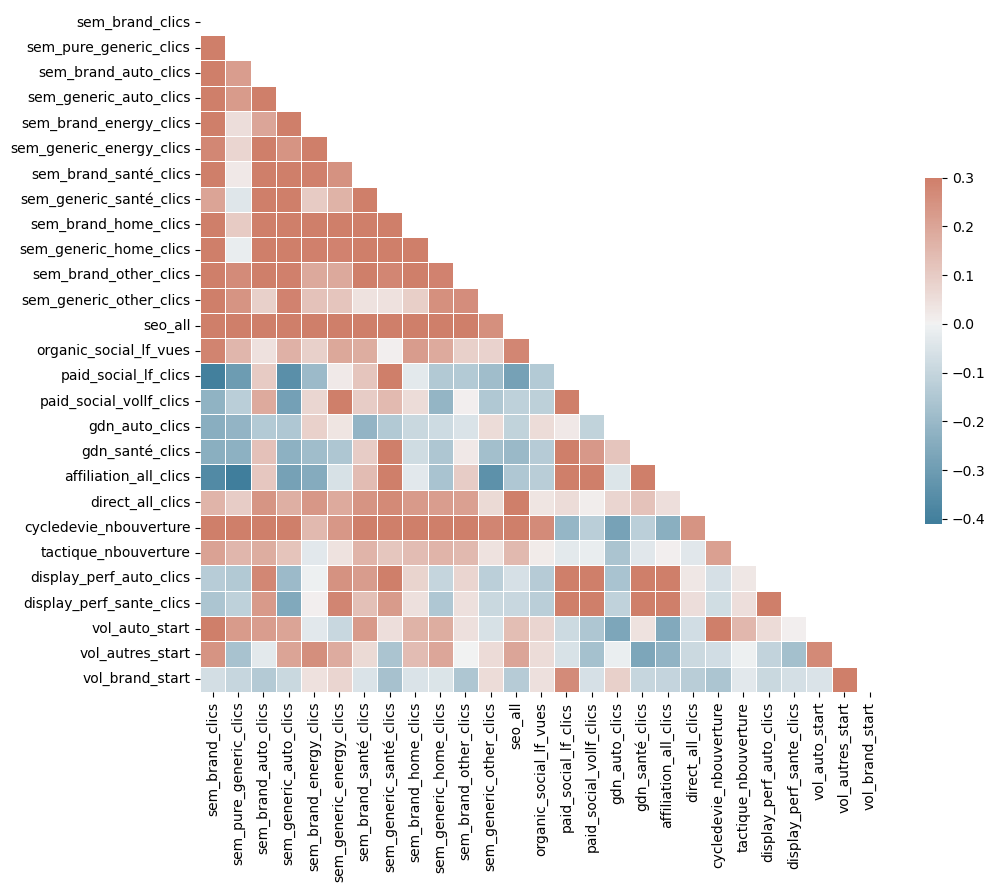

In [6]:
# Compute the correlation matrix
corr = x_features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
# sns.pairplot(x_features.iloc[:, :5])

In [7]:
feature_1 = x_features.sem_brand_clics.tolist()
feature_2 = x_features.sem_brand_energy_clics.tolist()
pearsonr(feature_1, feature_2)

PearsonRResult(statistic=0.30463084120176265, pvalue=2.83159240398074e-15)

In [8]:
# Linear regression:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_features_norm = scaler_x.fit_transform(x_features)
y_target_norm = scaler_y.fit_transform(y_target.to_numpy().reshape(-1, 1))

In [9]:
reg = LinearRegression().fit(x_features, y_target.to_numpy().reshape(-1, 1))
coeff_without_noise = reg.coef_.ravel()
coeff_without_noise.shape

(27,)

In [10]:
# Adding random gaussian noise to the predictors:
x_features_noise = x_features.copy()

n_rows = x_features_noise.shape[0]

for feature in x_features_noise:
    std_feature = x_features_noise[feature].std()
    noise = np.random.normal(0, (1/20) * std_feature, n_rows)
    x_features_noise[feature] = x_features_noise[feature] + noise


In [11]:
reg_noise = LinearRegression().fit(x_features_noise, y_target.to_numpy().reshape(-1, 1))
coeff_with_noise = reg_noise.coef_.ravel()

In [12]:
coeff_diff = coeff_with_noise - coeff_without_noise
mean_coeff = 0.5 * (np.absolute(coeff_with_noise) + np.absolute(coeff_without_noise))
relative_diff = 100 * (np.absolute(coeff_diff) / mean_coeff)
relative_diff = np.around(relative_diff, decimals=2)
relative_diff

array([ 0.18,  2.79,  1.21,  0.26,  0.98,  1.38,  1.82,  1.57, 16.23,
        1.28,  6.77, 16.54,  0.52, 13.18, 33.28,  3.52,  6.31, 11.18,
       20.59,  2.13,  0.92, 13.44,  3.46, 80.03,  2.24,  3.97,  3.28])

In [13]:
sign_coeff_without_noise = np.sign(coeff_without_noise)
sign_coeff_with_noise = np.sign(coeff_with_noise)

val_sign = sign_coeff_with_noise == sign_coeff_without_noise
val_sign

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [10]:
# Test: generate all combinations of elements of an iterable that contains a certains element.

from itertools import chain, combinations
def all_subsets(my_iter):
    return chain(*map(lambda x: combinations(my_iter, x), range(0, len(my_iter) + 1)))

my_iter = (1, 2, 5, 8, 10)

# for subset in all_subsets(my_iter):
#     print(subset)


for subset in filter(lambda x: 8 in x, combinations(my_iter, 3)):
    print(subset)


(1, 2, 8)
(1, 5, 8)
(1, 8, 10)
(2, 5, 8)
(2, 8, 10)
(5, 8, 10)


In [12]:
import numpy as np
# np.math.factorial(3)
npfactor = np.math.factorial

# weight = (npfactor(len_comb) * npfactor(num_predictors - len_comb - 1)) / npfactor(num_predictors)

# def get_weights(len_comb=0, num_predictors=0):
#     npfactor = np.math.factorial
#     if len_comb == 0:
#         return 0
#     else:
#         weight = (npfactor(len_comb) * npfactor(num_predictors - len_comb - 1)) / npfactor(num_predictors)
#         return weight


def get_weights(len_comb=0, num_predictors=0):
    npfactor = np.math.factorial
    len_comb = len_comb - 1
    weight = (npfactor(len_comb) * npfactor(num_predictors - len_comb - 1)) / npfactor(num_predictors)
    return weight

num_predictors = 5
for len_comb in range(0, num_predictors + 1):
    if len_comb == 0:
        weight = 0
    else:
        weight = get_weights(len_comb=len_comb, num_predictors=num_predictors)
    print(f"len_comb: {len_comb}, weigth: {weight}")


len_comb: 0, weigth: 0
len_comb: 1, weigth: 0.2
len_comb: 2, weigth: 0.05
len_comb: 3, weigth: 0.03333333333333333
len_comb: 4, weigth: 0.05
len_comb: 5, weigth: 0.2
